# EDA - Data Analyst Project 

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
# to be displayed plots directly within the notebook
%matplotlib inline    
import seaborn as sns

In [11]:
df = pd.read_csv('Diwali Sales Data.csv',encoding='unicode_escape')
# to avoid encoding error , use 'unicode_escape'

In [12]:
df.shape

(11251, 15)

In [13]:
df.size

168765

In [14]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [16]:
# drop empty columns
df.drop(['Status','unnamed1'], axis=1, inplace=True)

In [17]:
df.shape

(11251, 13)

In [20]:
# check the null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [21]:
# drop null values
df.dropna(inplace=True)

In [23]:
# here 12 null values are dropped
df.shape

(11239, 13)

In [25]:
# to change the data-type
df['Amount'] = df['Amount'].astype('int')

In [26]:
df['Amount'].dtype

dtype('int32')

In [28]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [31]:
# rename column
df.rename(columns = {'Gender':'Sex'}, inplace=True)

In [32]:
df.sample(4)

,User_ID,Cust_name,Product_ID,Sex,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
7665,1005889,Creighton,P00106042,F,51-55,54,0,Uttarakhand,Central,Banking,Clothing & Apparel,2,6857
4965,1000326,Jonathan,P00091142,F,51-55,54,0,Uttar Pradesh,Central,Aviation,Clothing & Apparel,4,8756
5855,1004725,Jackson,P00217342,F,36-45,37,0,Gujarat,Western,IT Sector,Electronics & Gadgets,2,8034
3157,1000442,Vivek,P00052442,F,26-35,34,1,Madhya Pradesh,Central,Govt,Food,1,12054


In [33]:
# describe() method returns description of the data un the DataFrame ( i.e. count, mean, std , etc0
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [34]:
# use describe() functions for specific colulmns
df[['Age','Orders','Amount']].describe()a

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# *Exploratory Data Analysis*

### Gender(Sex)

In [36]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Sex', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

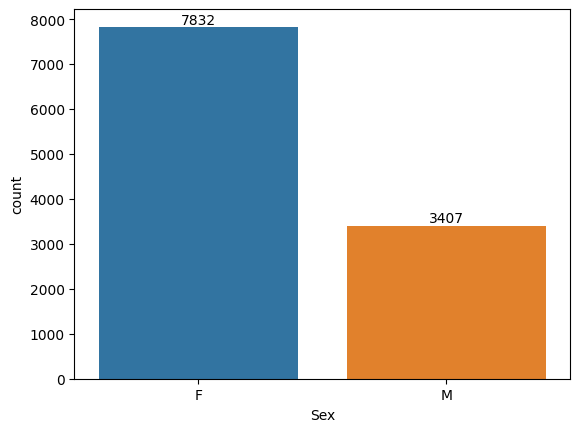

In [40]:
# To check who buy more products
ax = sns.countplot( x='Sex', data=df,hue='Sex')

# this loop use for counting
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Sex', ylabel='Amount'>

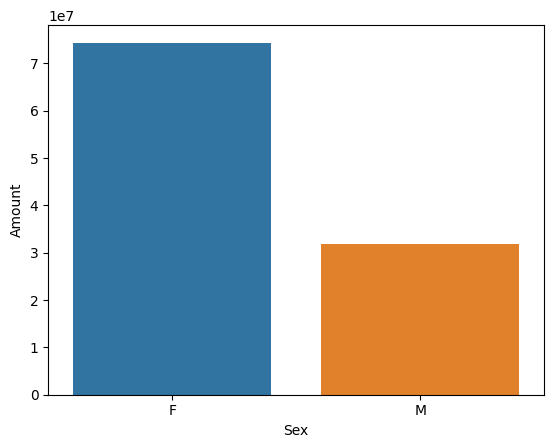

In [44]:
# to check who spend more money Male or Female
sales_gen = df.groupby(['Sex'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot( x='Sex', y='Amount', data=sales_gen, hue='Sex')

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than Male*

### Age

In [46]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Sex', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

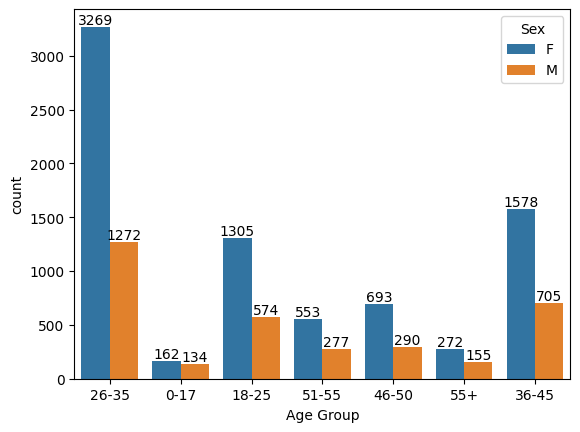

In [49]:
# sales graph
ax = sns.countplot(data=df, x='Age Group', hue='Sex')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

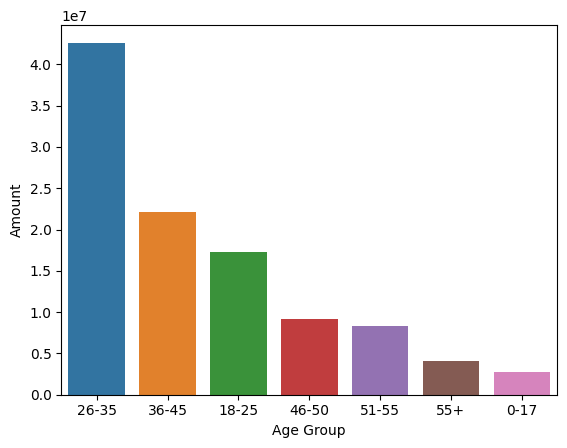

In [54]:
# Age Group VS Total Amount
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x='Age Group', y='Amount', data=sales_age, hue='Age Group')

*From above graph we can see that most of the buyers are of age group between 26-35 years*

### State

In [56]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Sex', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

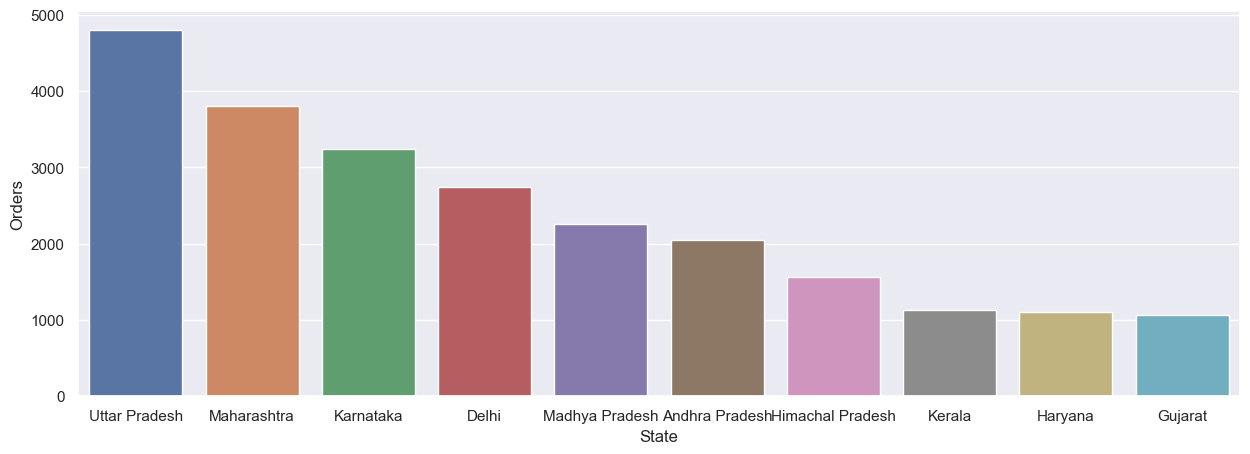

In [64]:
# total number of orders from top 10 states
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_state, x='State', y='Orders', hue='State')

<Axes: xlabel='State', ylabel='Amount'>

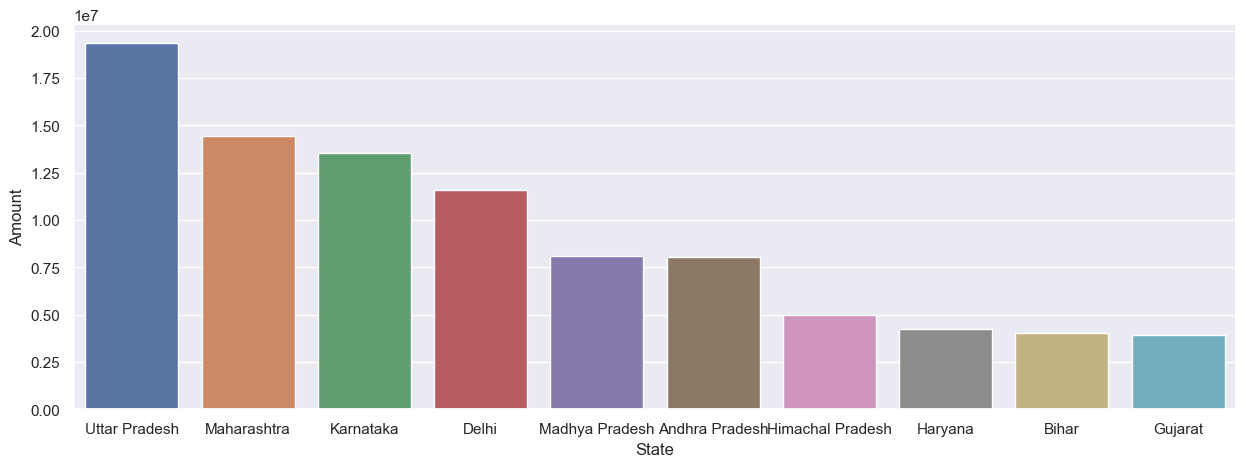

In [69]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_state, x='State', y='Amount', hue='State')


*From above graph we can see that unexpectedlyl most of the orders are from Uttar Pradesh, Maharashtra, Karnataka recpectively but total sales / amount is fromo UP, Karnataka and then Maharashtra*

### Marital Status

In [70]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Sex', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

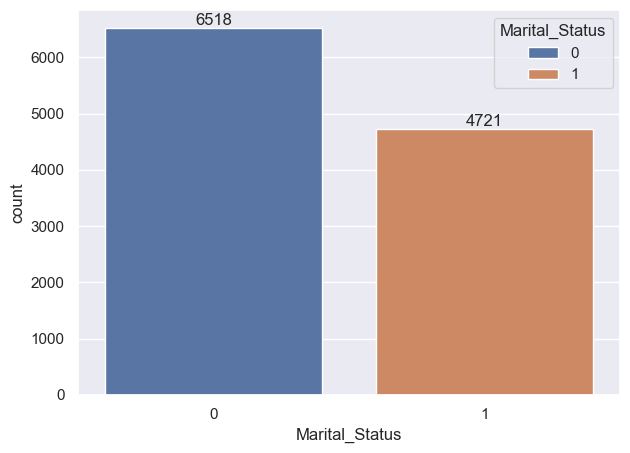

In [76]:
# sales graph
ax = sns.countplot(data=df, x='Marital_Status', hue='Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})                   
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

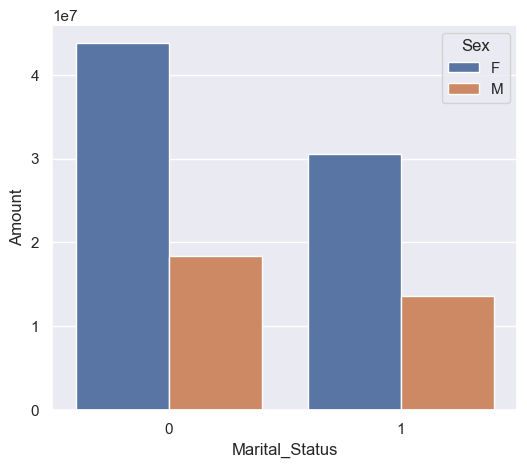

In [79]:
# Amount graph
sales_status = df.groupby(['Marital_Status','Sex'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data=sales_status, x='Marital_Status', y='Amount', hue='Sex')

*From above graph we can see that most of the buyers are married (women) and they have high purchasing history*

### Occupation

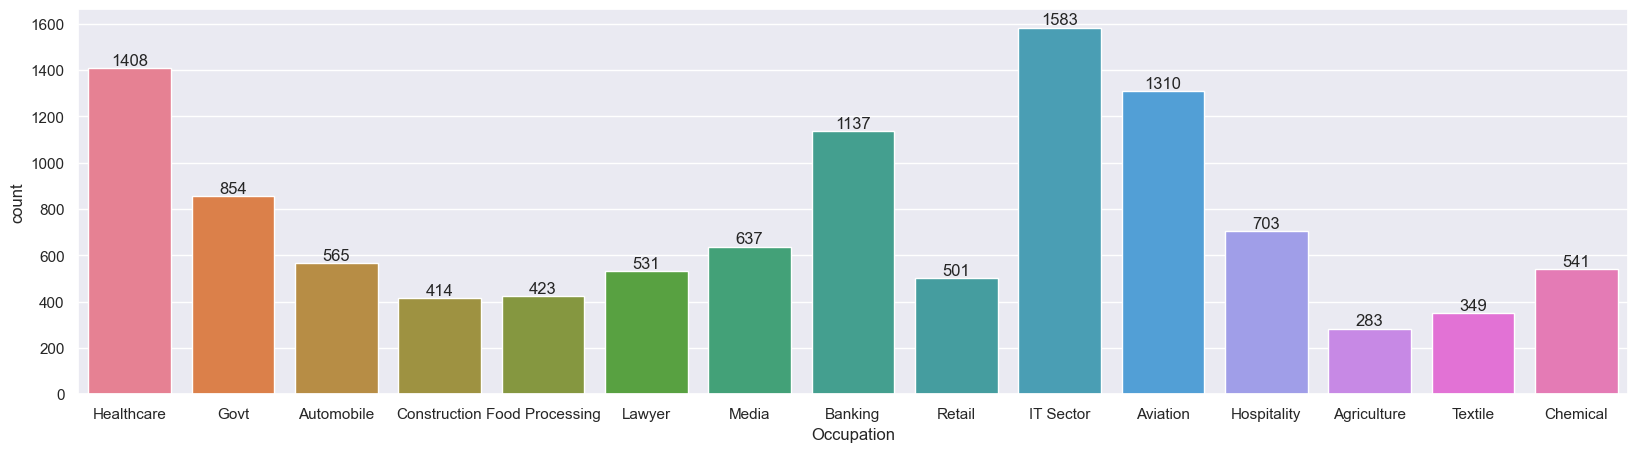

In [82]:
# sales graph
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data= df, x='Occupation', hue='Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

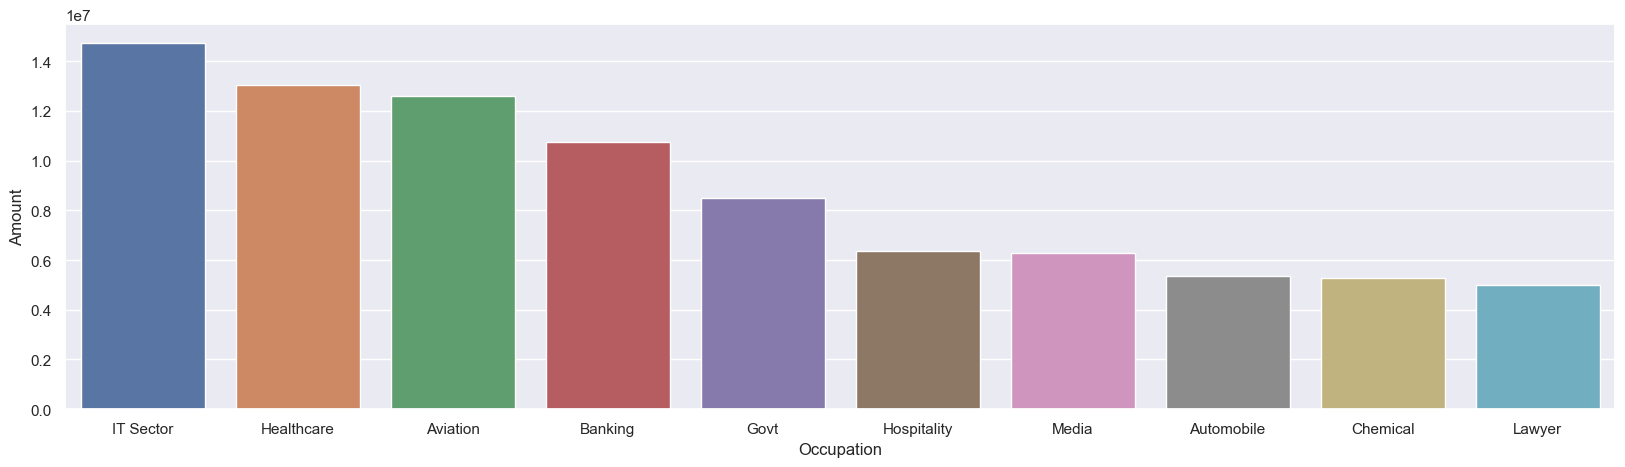

In [84]:
# Amount graph
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state, x='Occupation', y='Amount', hue='Occupation')

*From above graphs we can see that most of the buyers are working in IT, Aviation and Healthcare sector*

### Product Category

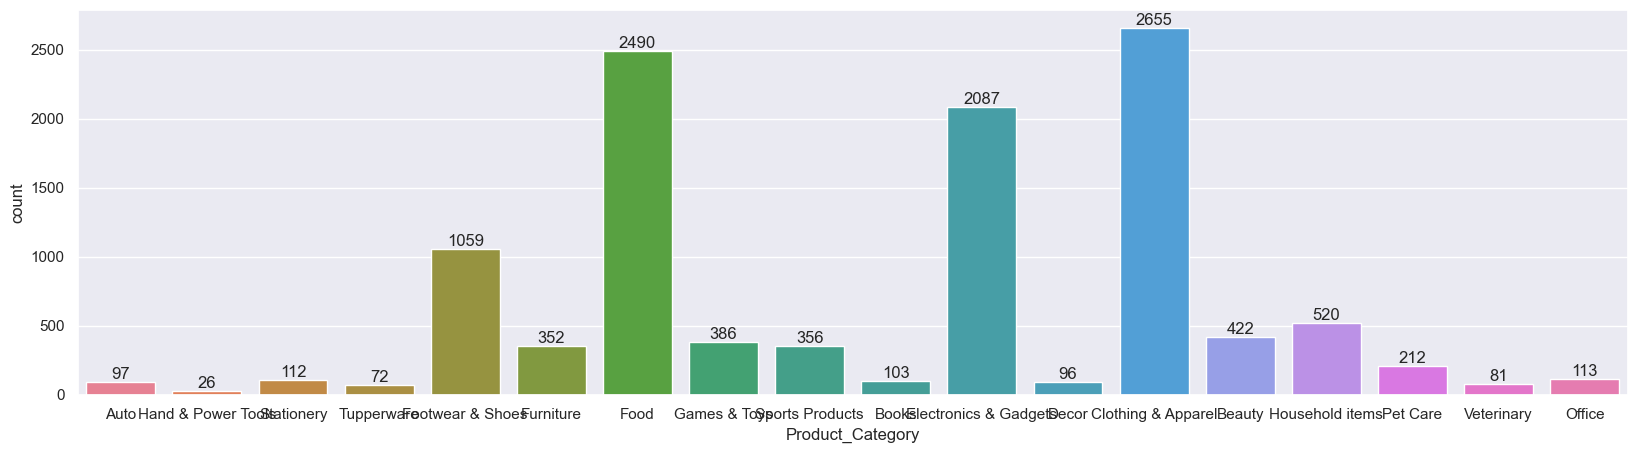

In [87]:
# sales graph
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data=df, x='Product_Category', hue='Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

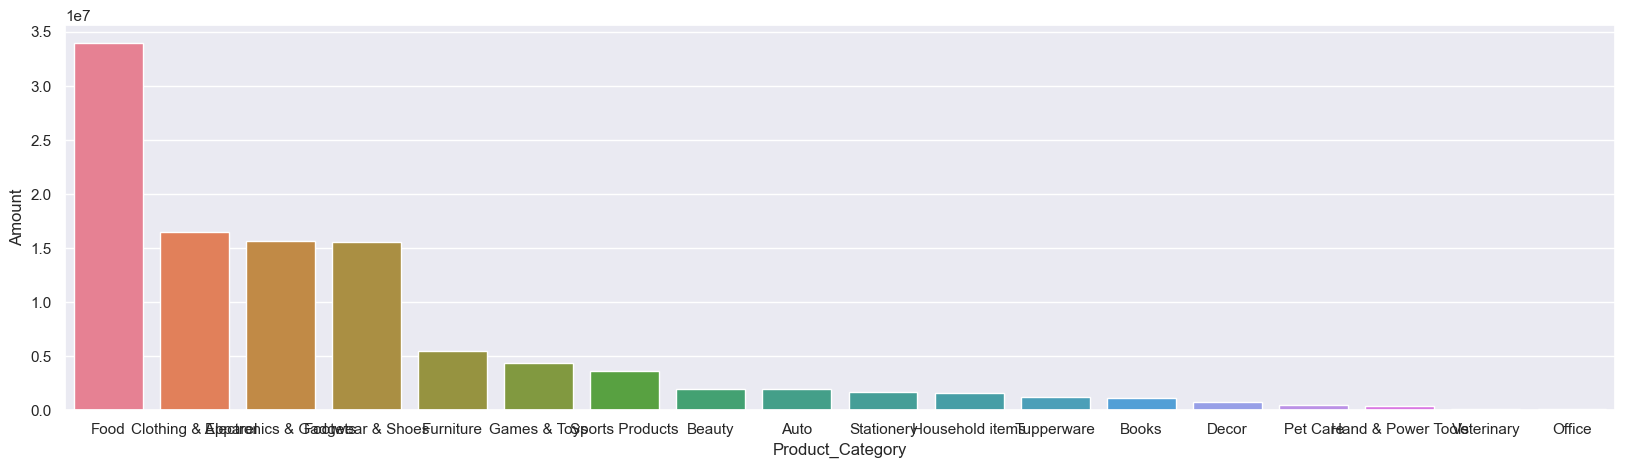

In [89]:
# Amount graph
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state, x='Product_Category', y='Amount', hue='Product_Category')

*From above graphs we can see that most of the products are from Food, Clothing, and Electronics*

### Product ID

<Axes: xlabel='Product_ID', ylabel='Orders'>

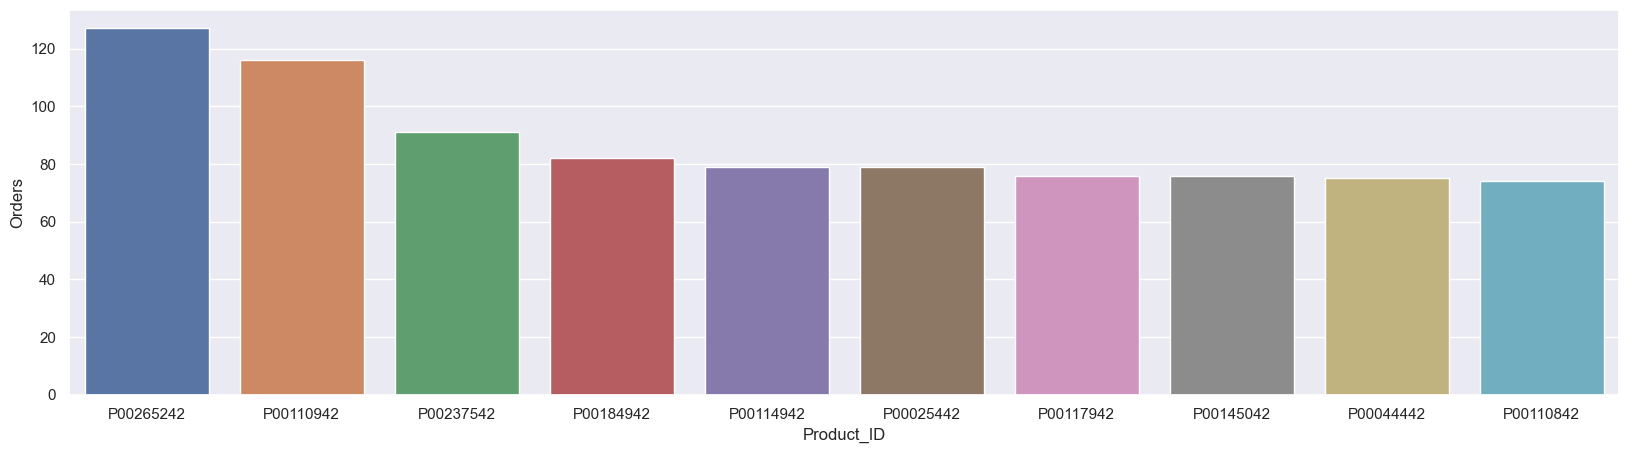

In [92]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state, x='Product_ID', y='Orders', hue='Product_ID')

<Axes: xlabel='Product_ID'>

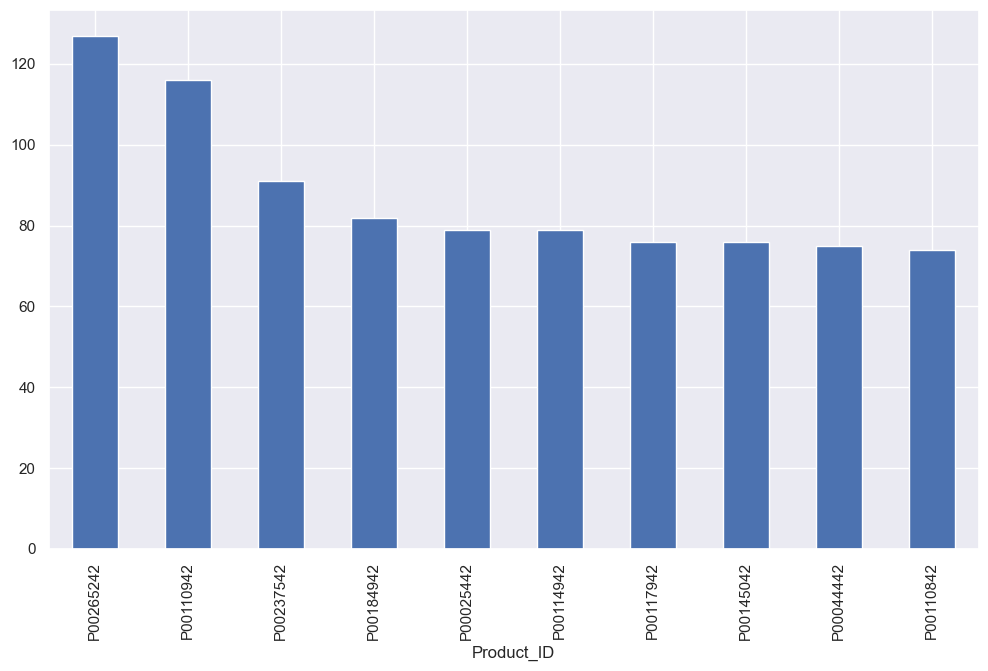

In [95]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

### Conclulsion

* #### *Married women* age group *26-35 years* from *UP, Maharashtra and Karnataka* in *IT, Health-care and Aviation* more likely buy products from *Food, Clothing and Electronics category*